## Limpieza de datos

In [1]:
import pandas as pd
import seaborn as sns

C:\Users\juanm\AppData\Local\Temp\ipykernel_38852\432526209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('data.txt')

In [3]:
data.head()
data = data.drop('date', axis=1)
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [4]:
#Eliminar espacio de 'finishing '
valor_a_eliminar = 'finishing ' 
caracter_a_eliminar = ' '
data['department'] = data['department'].str.replace(caracter_a_eliminar, '')
# Comprobar
data['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [5]:
datacopy = data
data_sin_nulos = datacopy.dropna(subset=['wip'])
# Calcular la media de 'wip' para cada combinación de 'department' y 'team'
media_wip_por_combinacion = datacopy.groupby(['department', 'team'])['wip'].mean()

print("Media de 'wip' por combinación de 'department' y 'team':")
print(media_wip_por_combinacion)


Media de 'wip' por combinación de 'department' y 'team':
department  team
finishing   1               NaN
            2               NaN
            3               NaN
            4               NaN
            5               NaN
            6               NaN
            7               NaN
            8               NaN
            9               NaN
            10              NaN
            11              NaN
            12              NaN
sweing      1       1609.196429
            2       1326.280702
            3       1409.293103
            4       1218.677966
            5        773.741379
            6        936.559322
            7        999.509091
            8        984.375000
            9       1283.724138
            10      1528.333333
            11       968.135593
            12      1259.915254
Name: wip, dtype: float64


In [6]:
datos_finishing = data[data['department'] == 'finishing']

if datos_finishing['wip'].isnull().all():
    print("Todos los valores en la lista resultante son vacíos.")
else:
    print("Al menos un valor en la lista resultante no es vacío.")

Todos los valores en la lista resultante son vacíos.


In [7]:
# Calcular el valor promedio de 'wip' para cada equipo
promedio_wip_por_equipo = data.groupby('team')['wip'].mean()
# promedio_wip_por_equipo

In [8]:
datac = data# Recorrer las filas de la columna 'wip'
for indice, valor_wip in enumerate(datac['wip']):
    # Verificar si el valor de 'wip' en la fila actual es nulo o faltante
    if pd.isnull(valor_wip):
        equipo = datac.iloc[indice, 3]
        media = promedio_wip_por_equipo[equipo]
        # print(indice), print(equipo)
        datac.iloc[indice, 6] = media
datac.head(50)
data = datac

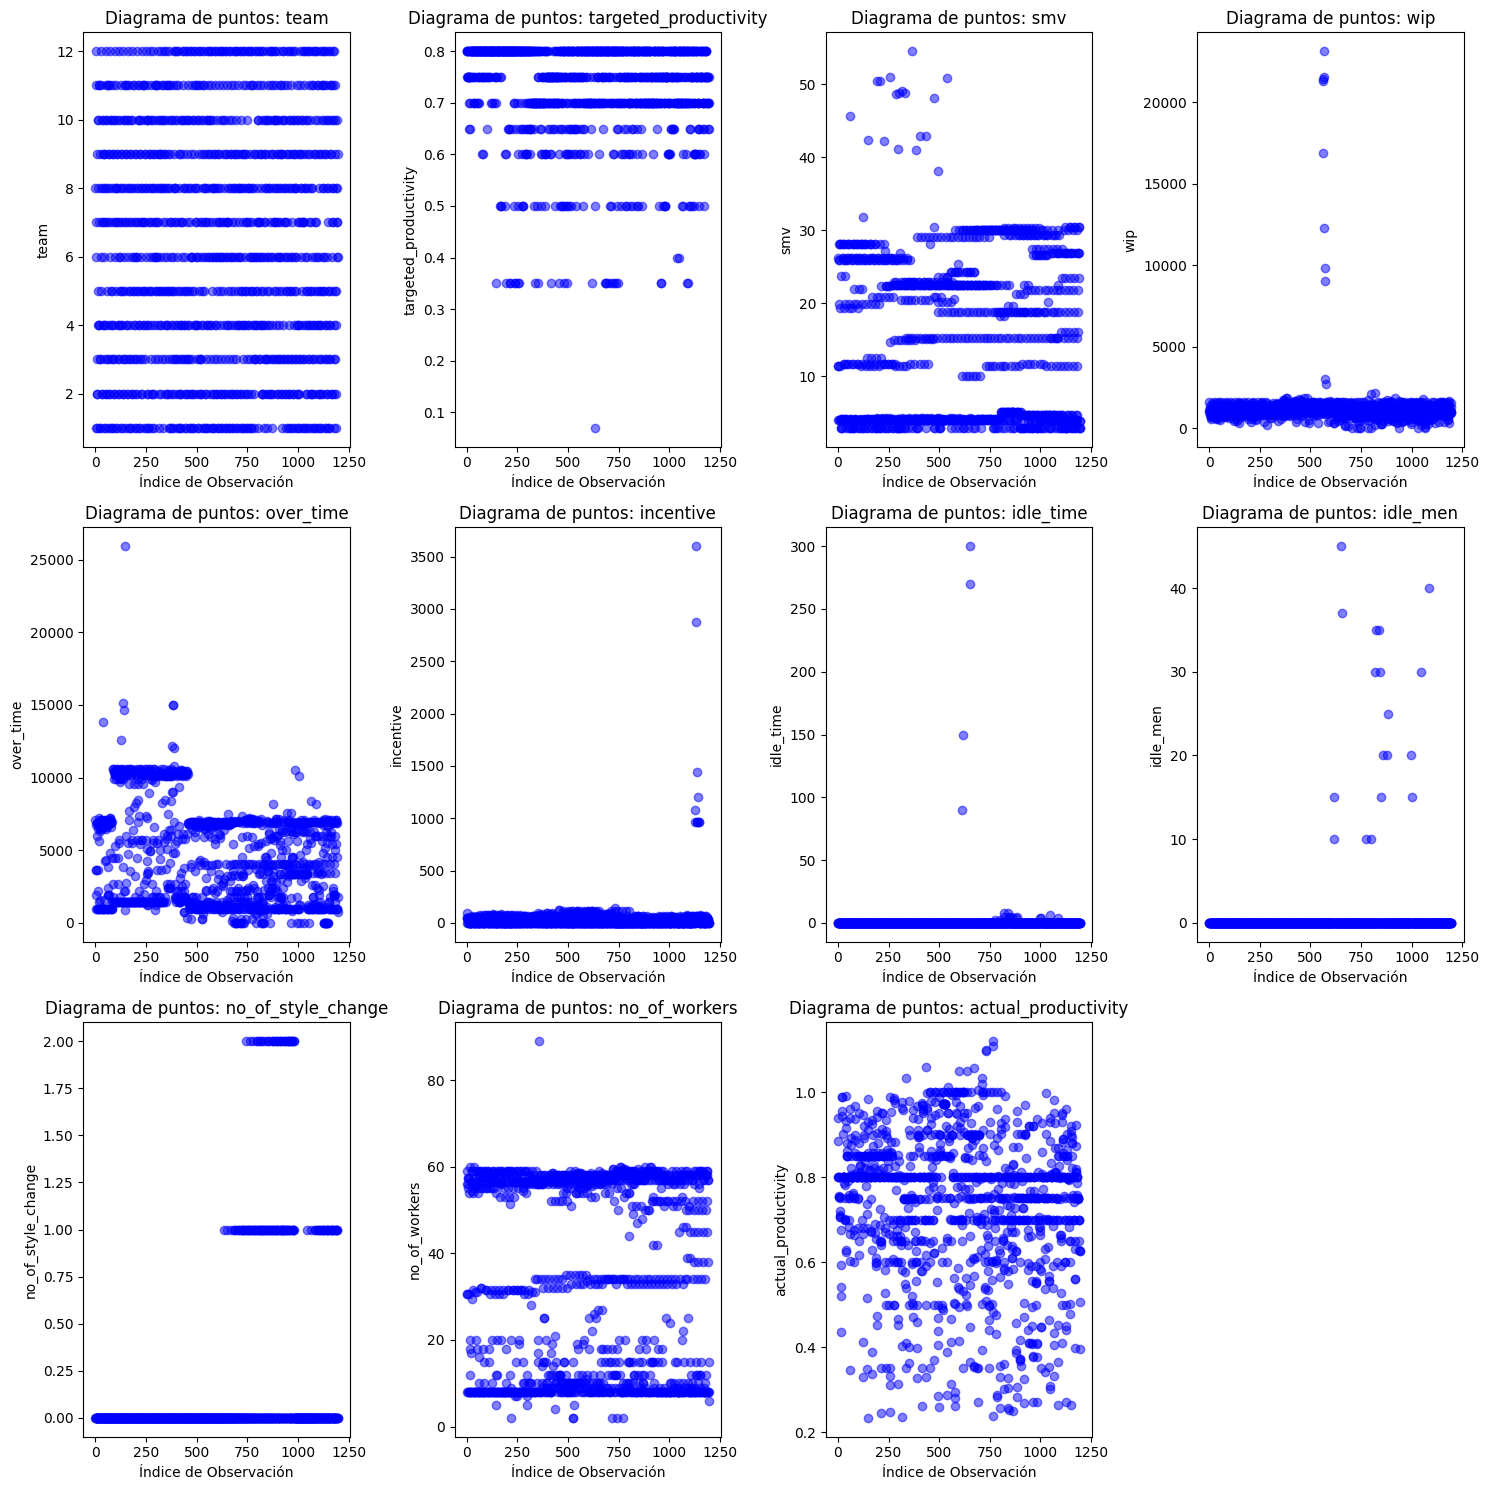

In [9]:
import matplotlib.pyplot as plt

numeric_variables = data.select_dtypes(include=['float64', 'int64'])
num_plots = len(numeric_variables.columns)
num_rows = int(num_plots**0.5)  # Número de filas
num_cols = (num_plots + num_rows - 1) // num_rows  # Número de columnas

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Generar diagrama de puntos para cada variable numérica
for i, column in enumerate(numeric_variables.columns):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].scatter(data.index, data[column], alpha=0.5, color='blue')
    axs[row, col].set_title(f'Diagrama de puntos: {column}')
    axs[row, col].set_xlabel('Índice de Observación')
    axs[row, col].set_ylabel(column)

# Eliminar subplots no utilizados
for i in range(num_plots, num_rows*num_cols):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

## Exploración de datos

In [10]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1198.735765,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1404.692047,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,925.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1096.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1326.280702,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [11]:
data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1609.196429,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


In [12]:
import seaborn as sns

In [13]:
%matplotlib inline

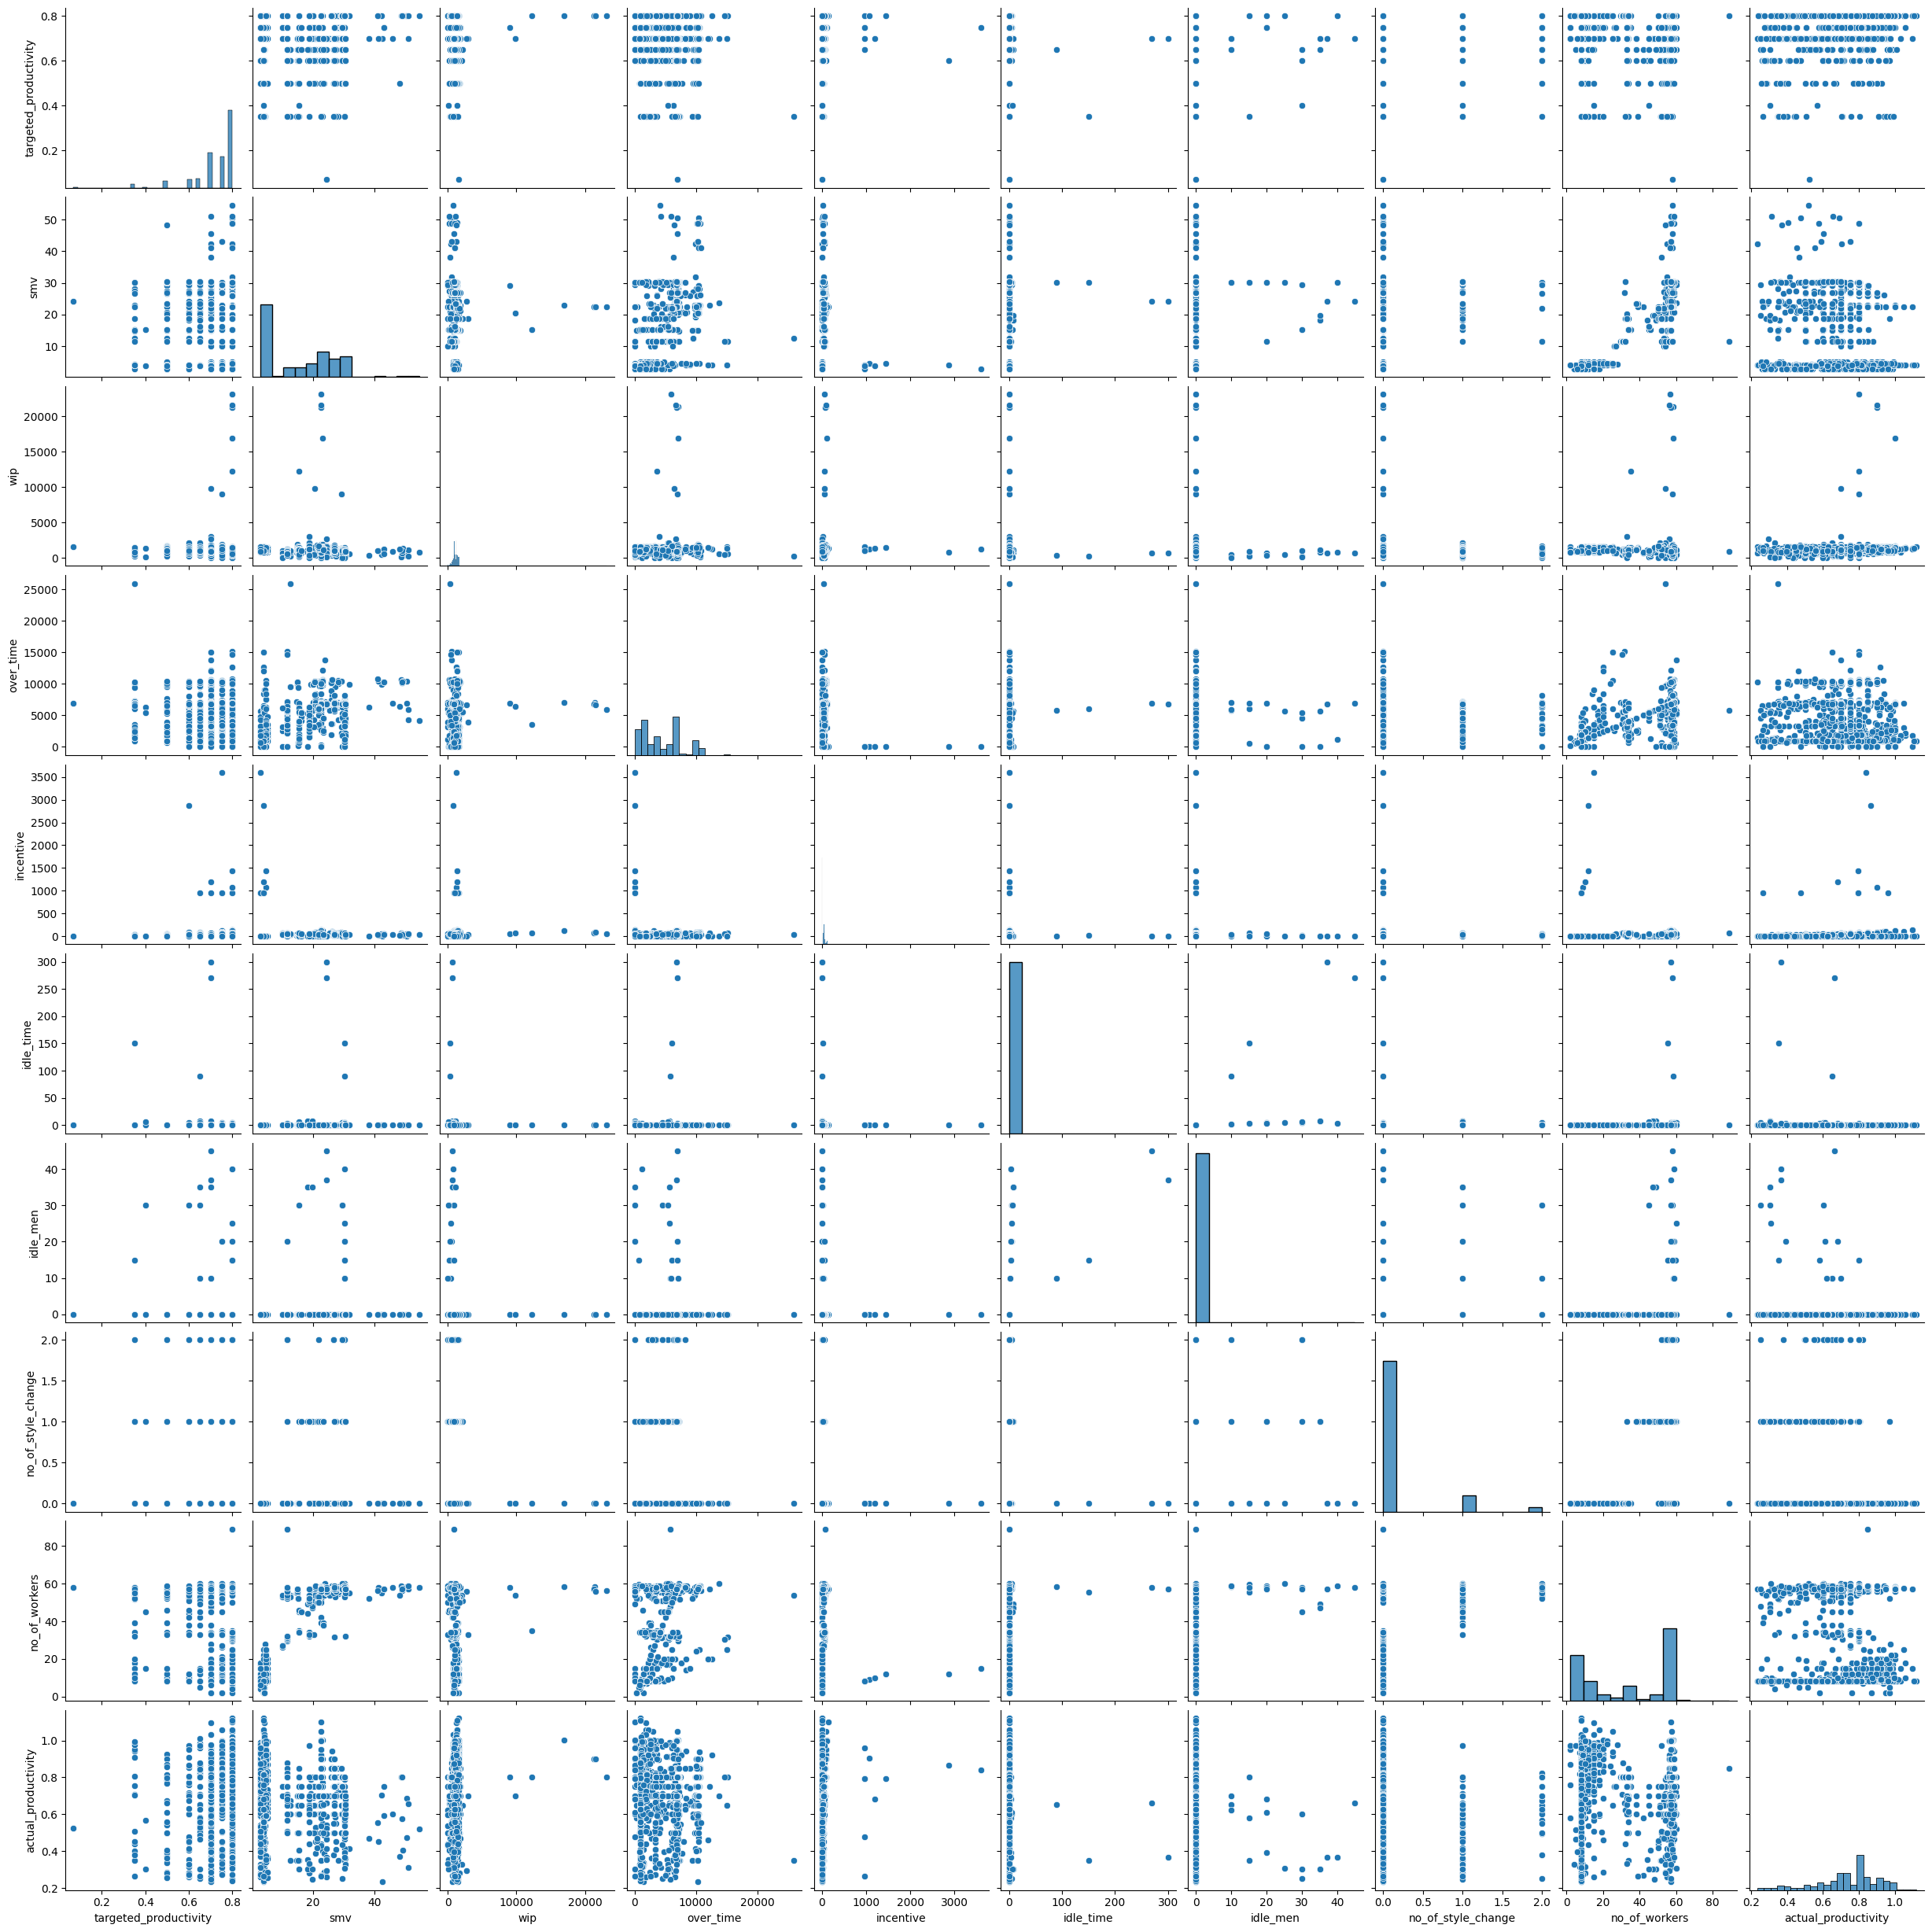

In [14]:
features=["targeted_productivity","smv","wip","over_time","incentive","idle_time","idle_men","no_of_style_change","no_of_workers","actual_productivity"]
data_filtered=data[features]

sns.pairplot(data_filtered,)

Matriz de correlación

<Axes: >

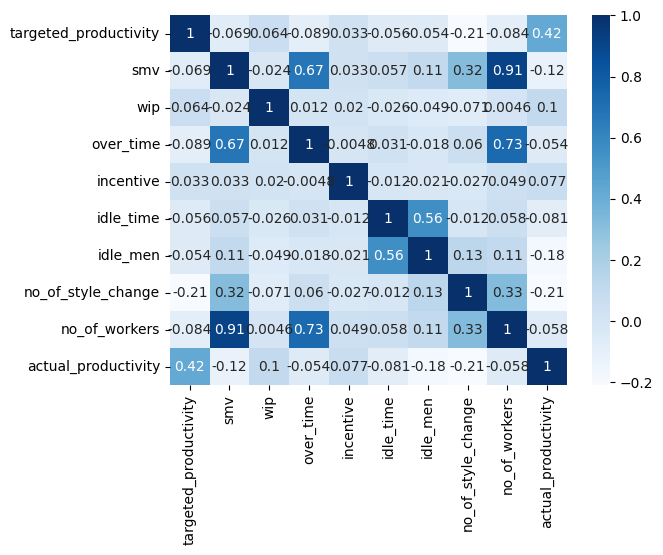

In [15]:
import seaborn as sb
corr = data_filtered.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

Gráficos de violín

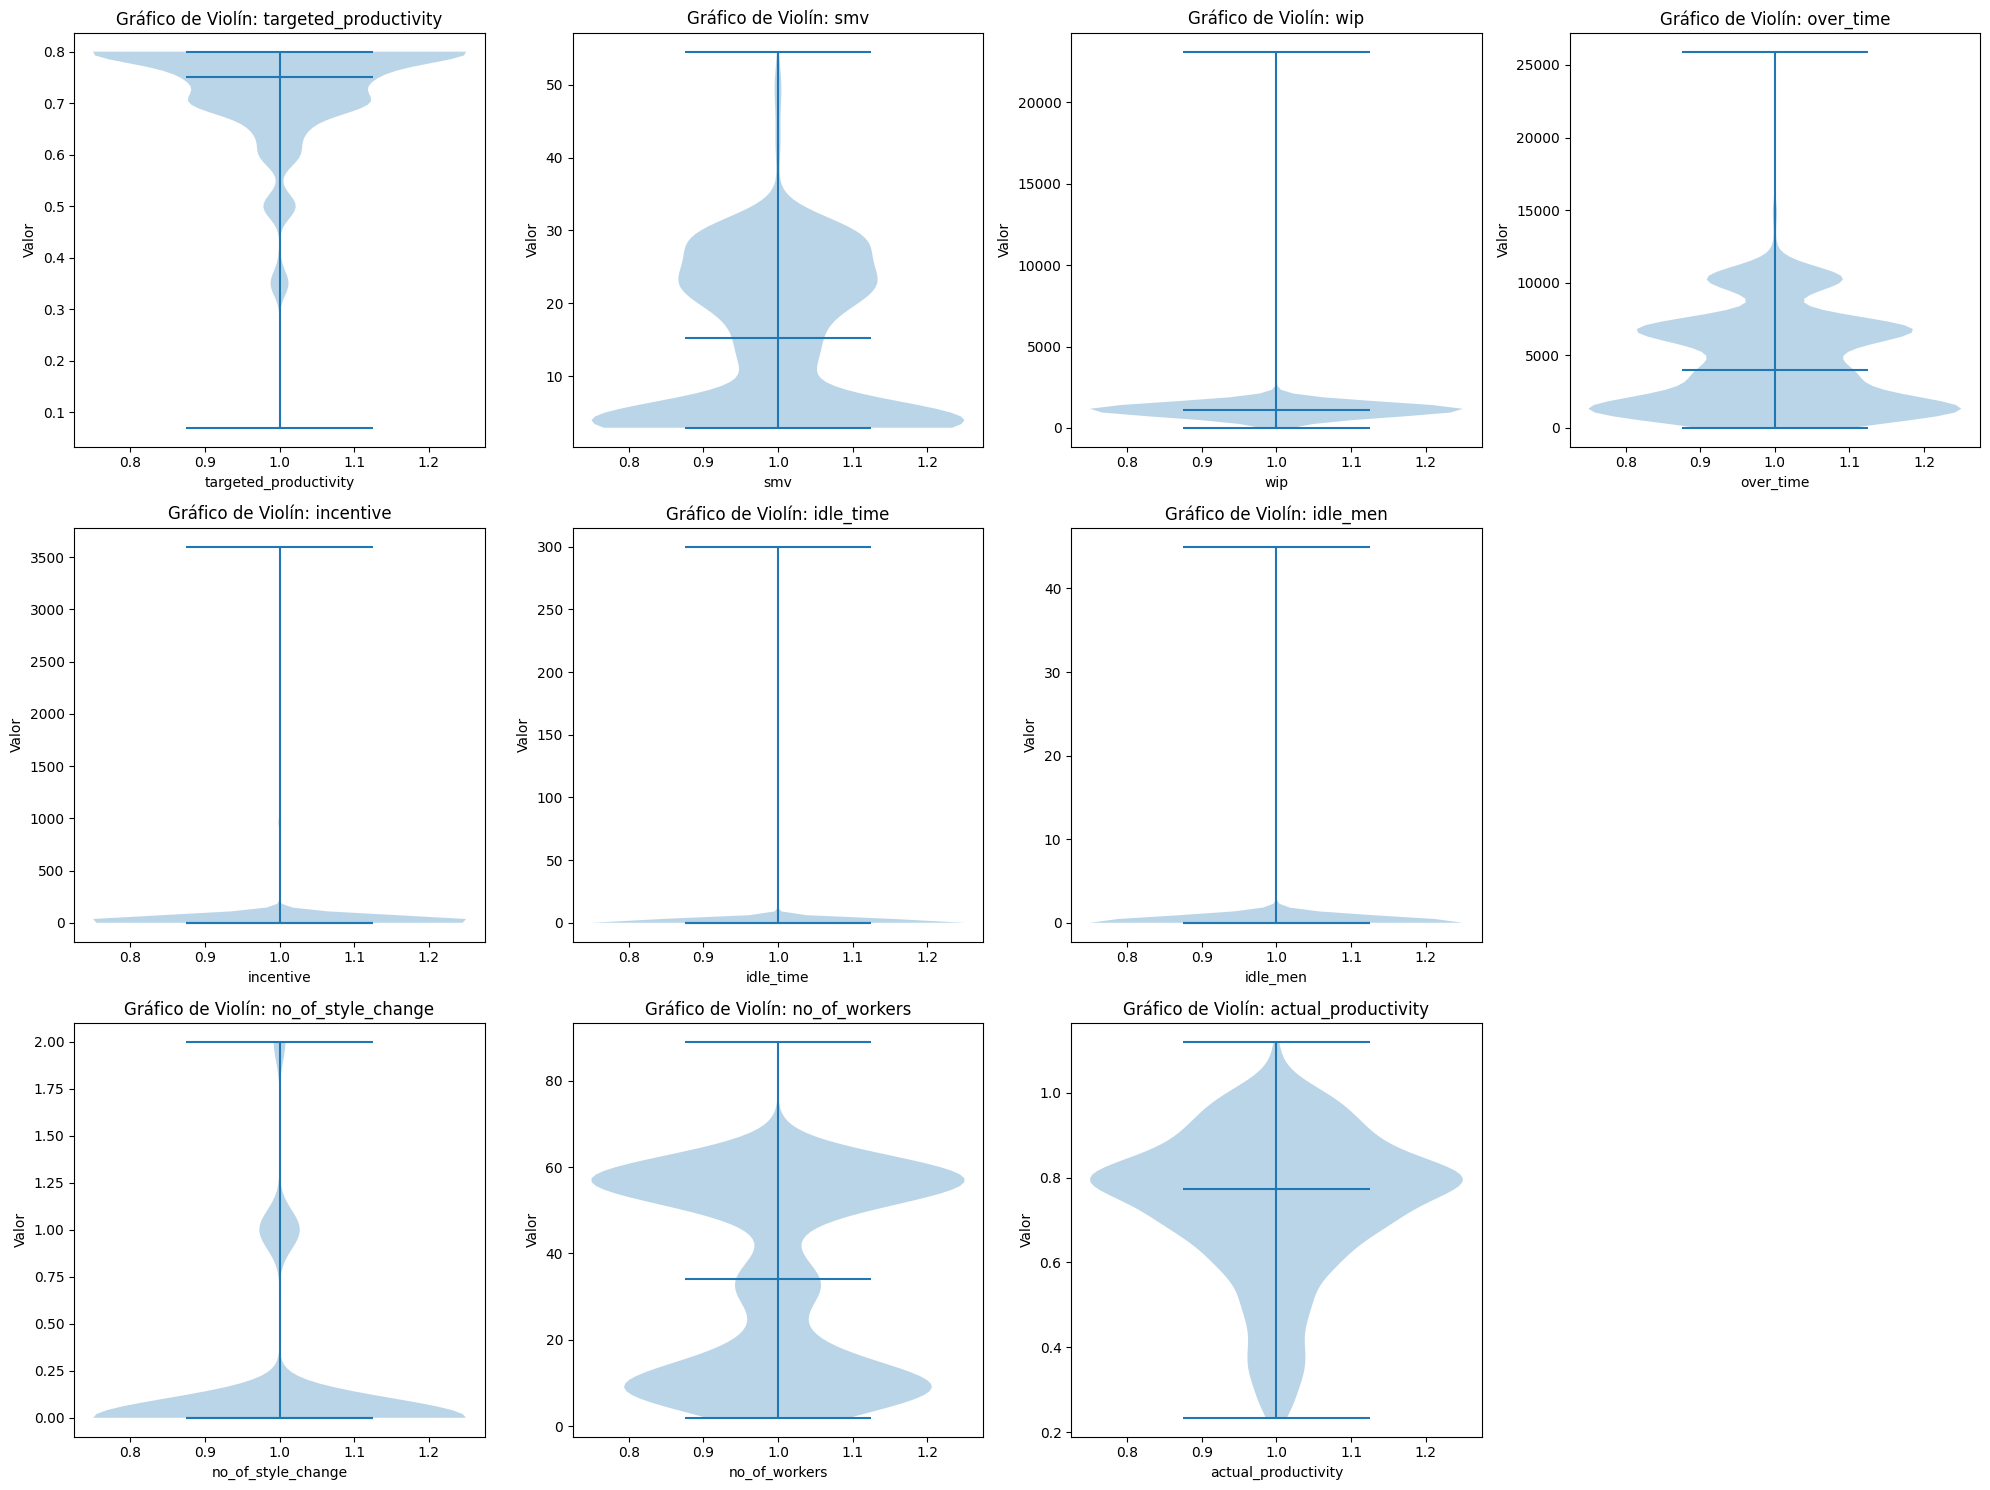

In [16]:
fig = plt.figure(figsize=(20, 15))  # Ajusta el tamaño general de la figura

for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][:4]):
    ax = fig.add_subplot(3, 4, i+1)  # 3 filas, 4 columnas, posición i+1
    ax.violinplot(data[column], showmeans=False, showmedians=True)
    ax.set_title(f'Gráfico de Violín: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Valor')

for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][4:7], start=4):
    ax = fig.add_subplot(3, 4, i+1)
    ax.violinplot(data[column], showmeans=False, showmedians=True)
    ax.set_title(f'Gráfico de Violín: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Valor')

for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][7:10], start=8):
    ax = fig.add_subplot(3, 4, i+1) 
    ax.violinplot(data[column], showmeans=False, showmedians=True)
    ax.set_title(f'Gráfico de Violín: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()

plt.show()

Histogramas

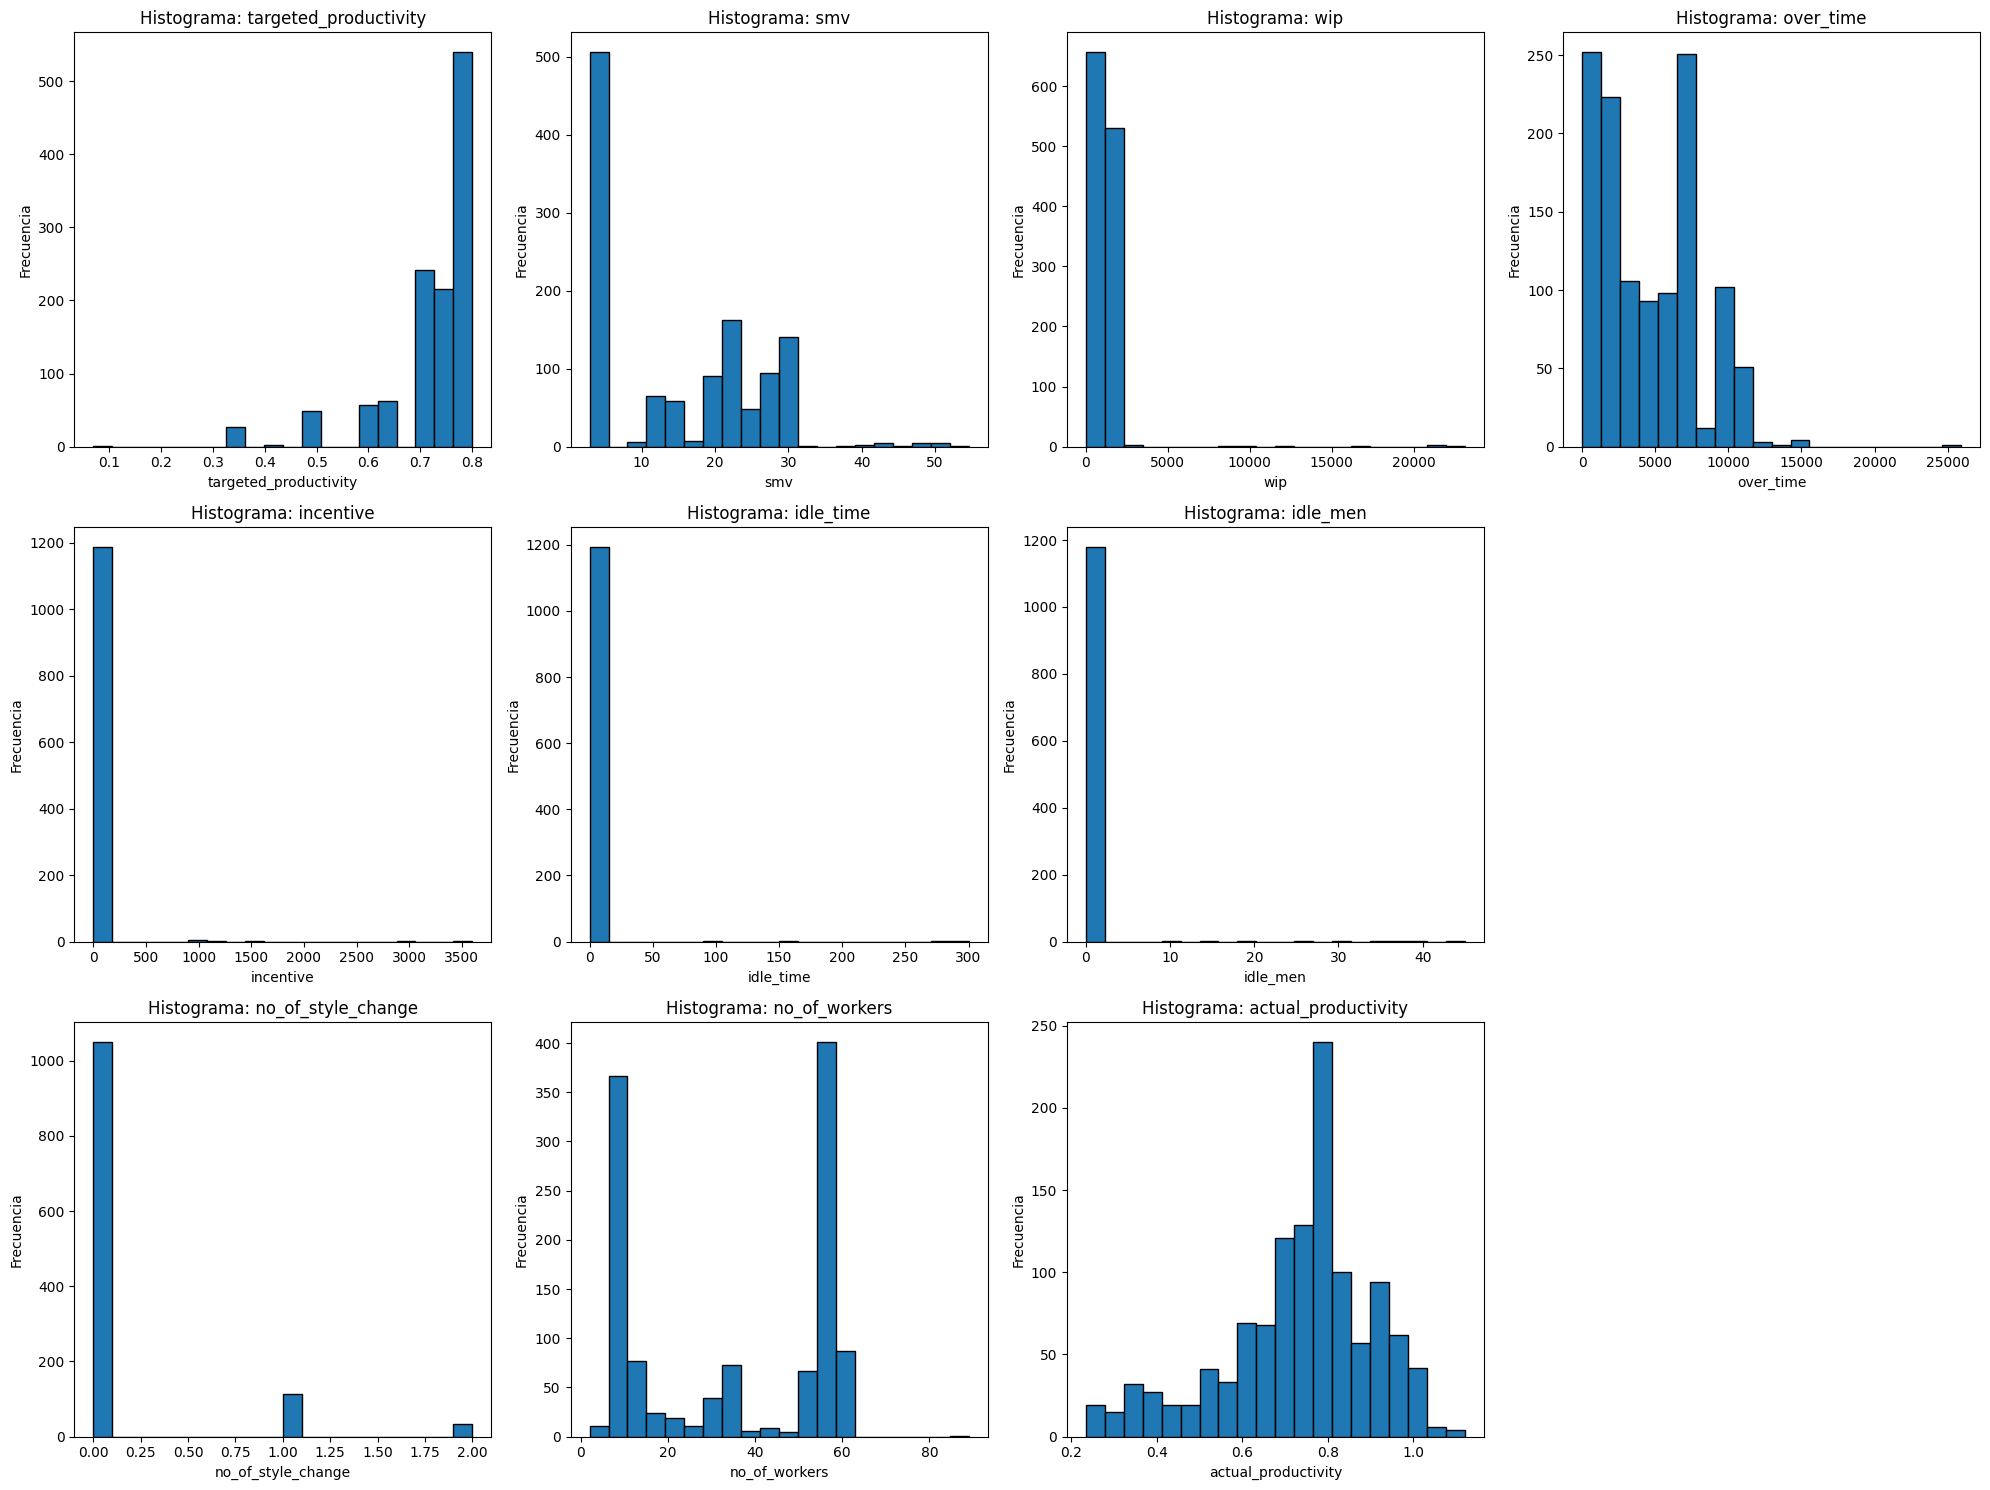

In [17]:
fig = plt.figure(figsize=(20, 15))


for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][:4]):
    ax = fig.add_subplot(3, 4, i+1)  
    ax.hist(data[column], bins=20, edgecolor='black') 
    ax.set_title(f'Histograma: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')


for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][4:7], start=4):
    ax = fig.add_subplot(3, 4, i+1)
    ax.hist(data[column], bins=20, edgecolor='black')
    ax.set_title(f'Histograma: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

for i, column in enumerate([col for col in numeric_variables.columns if col != "team"][7:10], start=8):
    ax = fig.add_subplot(3, 4, i+1) 
    ax.hist(data[column], bins=20, edgecolor='black')  
    ax.set_title(f'Histograma: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()  
plt.show()

Tendencias entre variables de entrada y respuesta

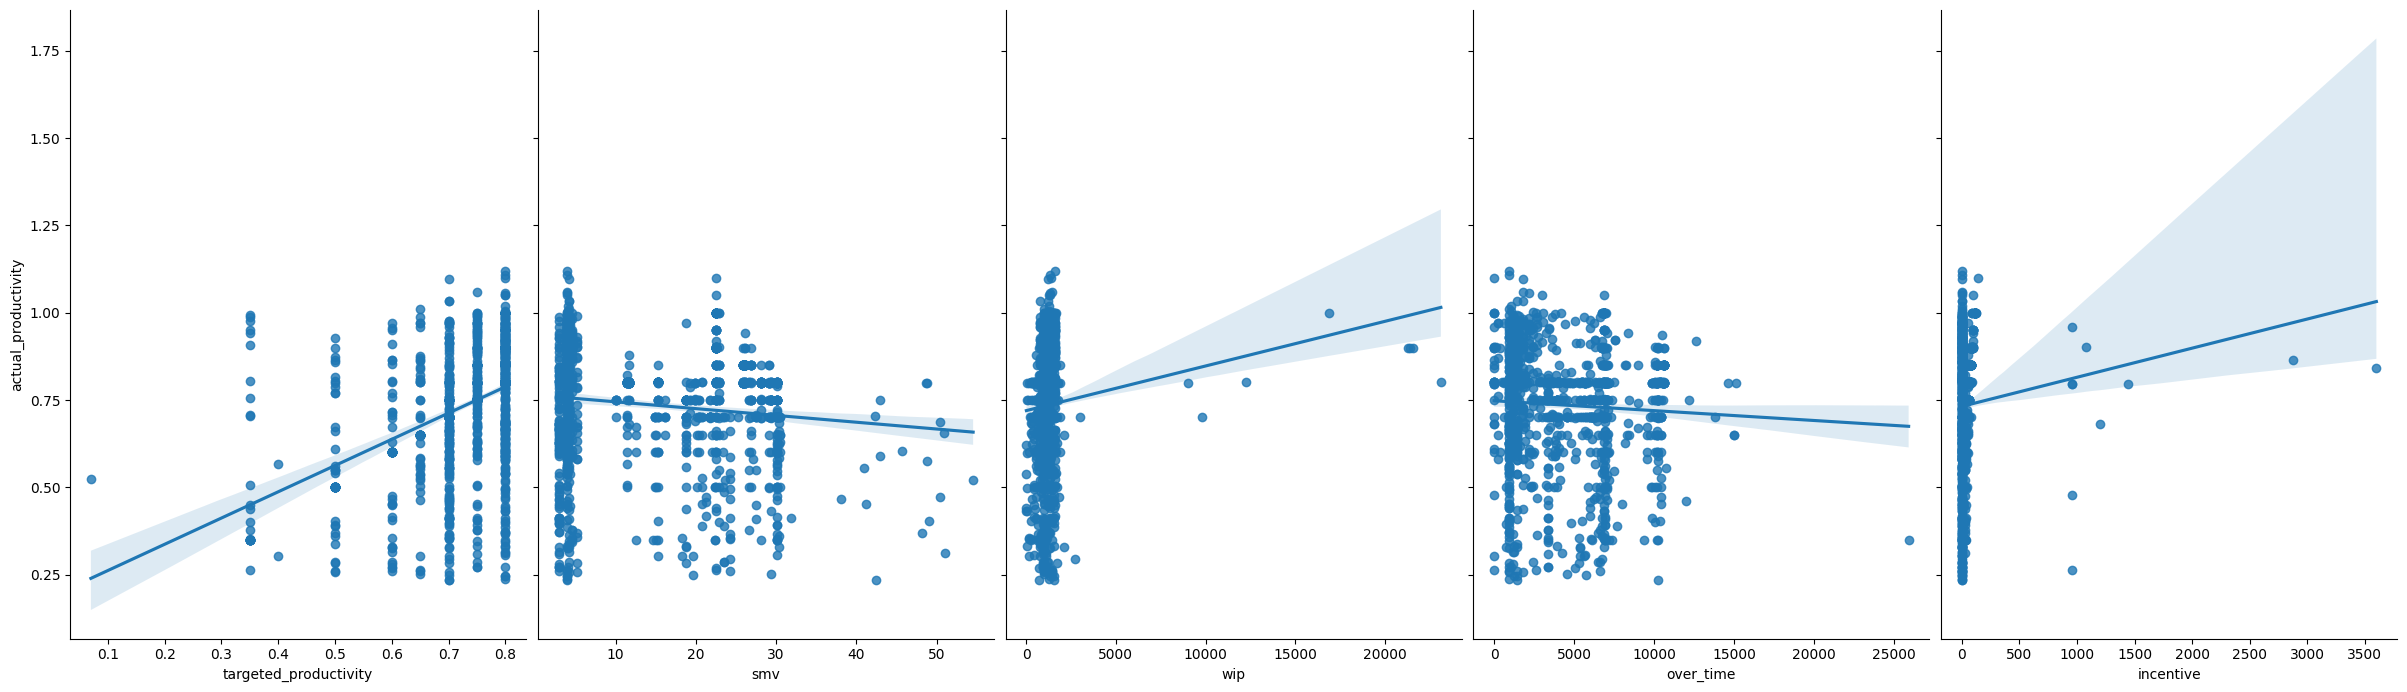

In [18]:
sns.pairplot(data, x_vars=["targeted_productivity","smv","wip","over_time","incentive"], y_vars="actual_productivity", height=7, aspect=0.7, kind='reg')

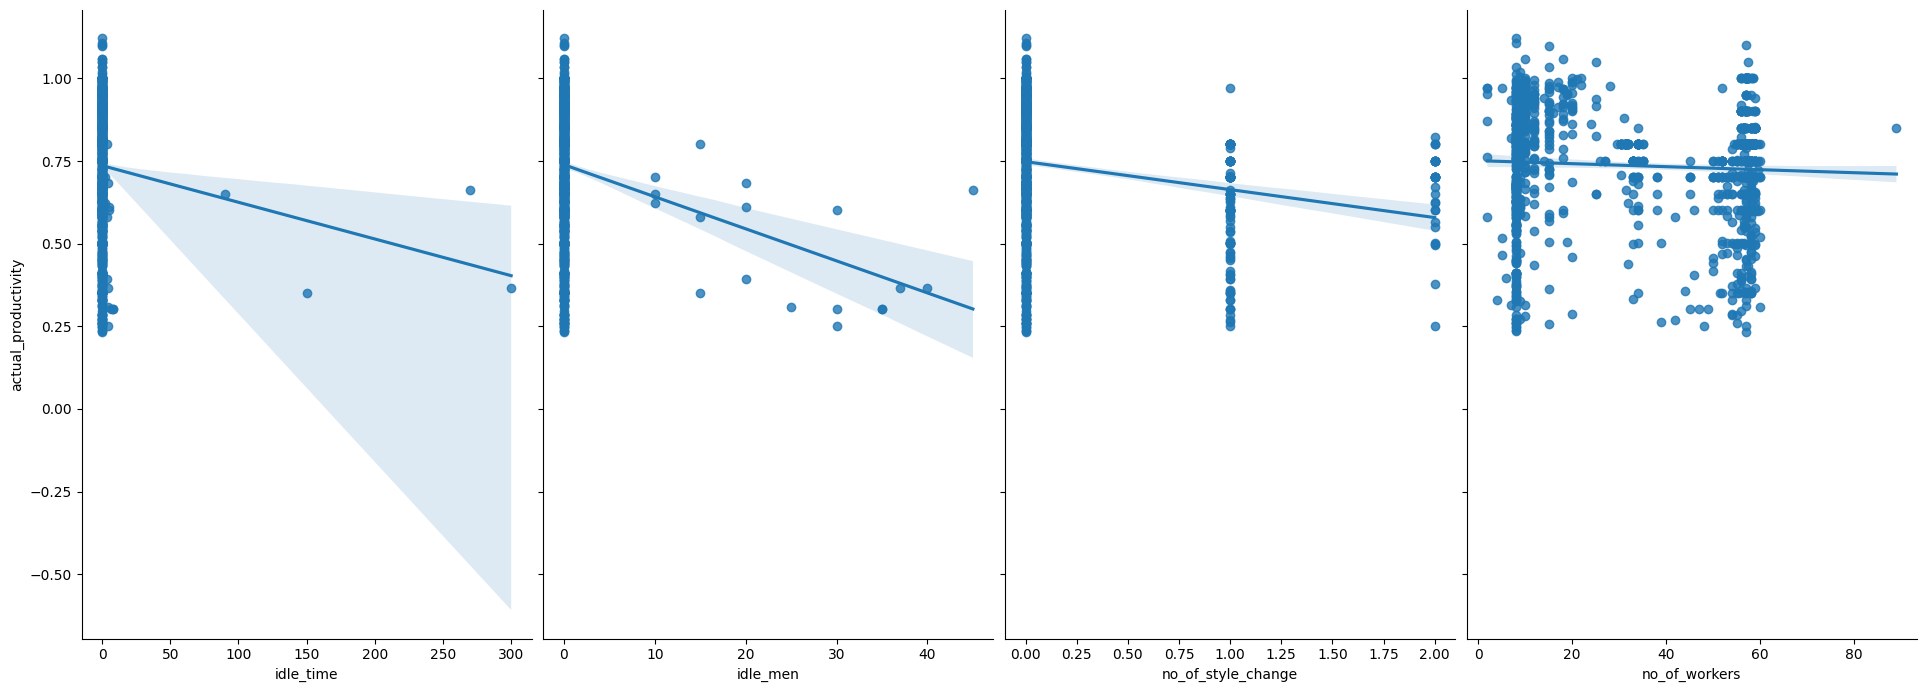

In [19]:
sns.pairplot(data, x_vars=["idle_time","idle_men","no_of_style_change","no_of_workers"], y_vars="actual_productivity", height=7, aspect=0.7, kind='reg')

Algunas visualizaciones de interés

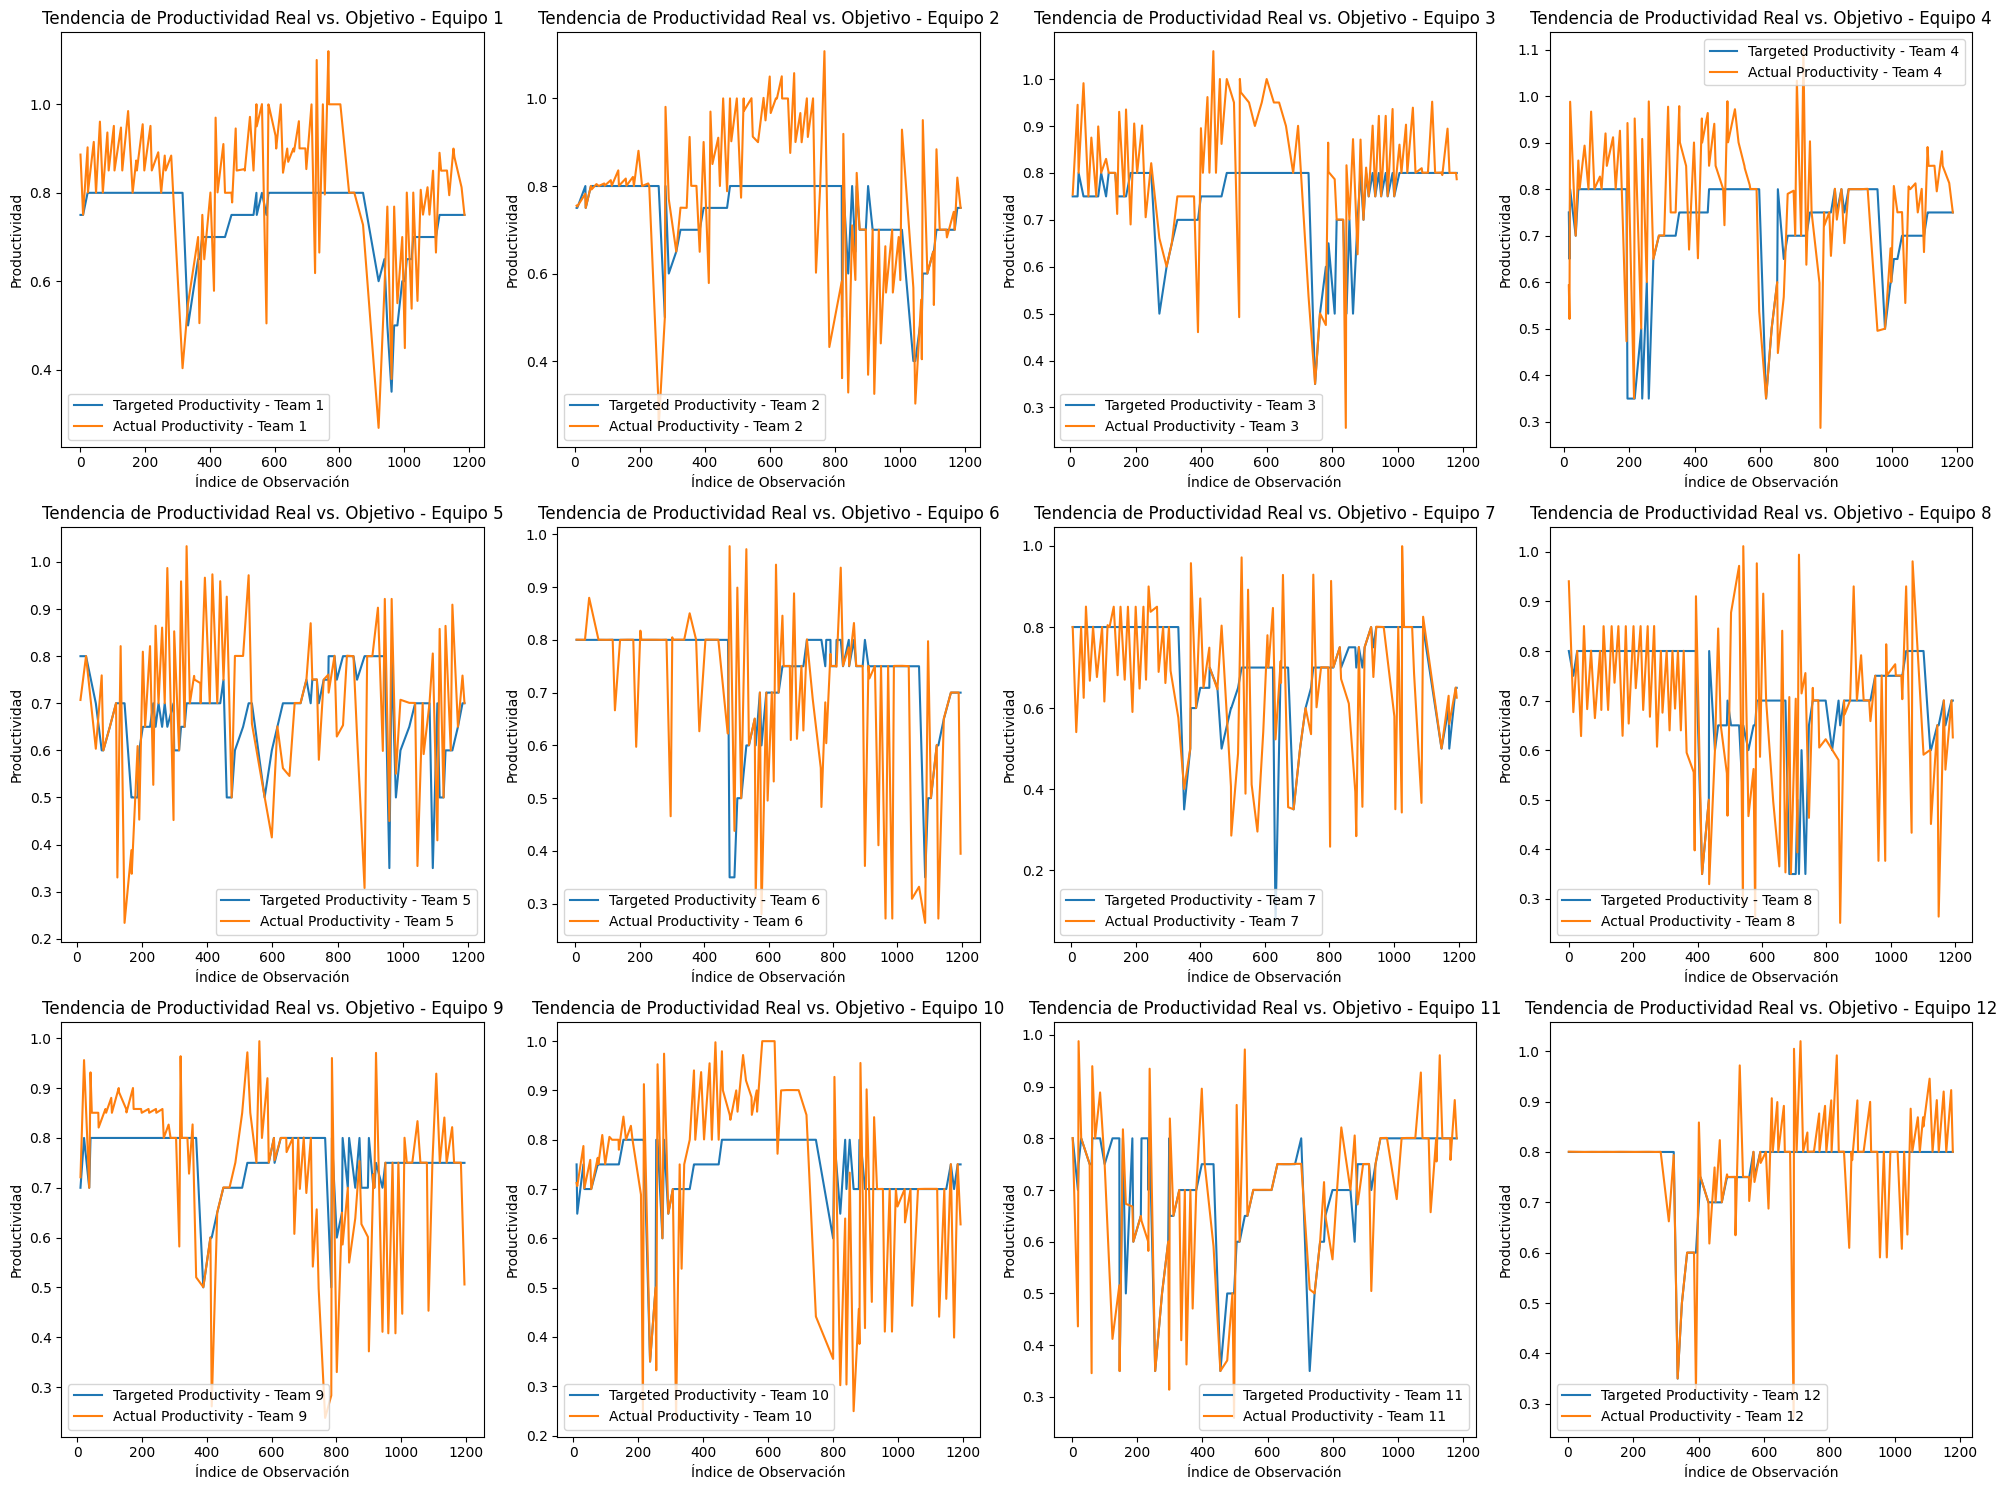

In [20]:
import matplotlib.pyplot as plt

# Obtener la lista de equipos
equipos = data['team'].unique()
equipos = sorted(data['team'].unique())
num_equipos = len(equipos)
num_rows = int(num_equipos**0.5)  # Número de filas
num_cols = (num_equipos + num_rows - 1) // num_rows  # Número de columnas

# Crear subgráficos
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Gráfico de línea para la tendencia de productividad real vs. objetivo por equipo
for i, equipo in enumerate(equipos):
    row = i // num_cols
    col = i % num_cols
    equipo_data = data[data['team'] == equipo]
    axs[row, col].plot(equipo_data.index, equipo_data['targeted_productivity'], label=f'Targeted Productivity - Team {equipo}')
    axs[row, col].plot(equipo_data.index, equipo_data['actual_productivity'], label=f'Actual Productivity - Team {equipo}')
    axs[row, col].set_xlabel('Índice de Observación')
    axs[row, col].set_ylabel('Productividad')
    axs[row, col].set_title(f'Tendencia de Productividad Real vs. Objetivo - Equipo {equipo}')
    axs[row, col].legend()

# Eliminar subgráficos no utilizados
for i in range(num_equipos, num_rows*num_cols):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

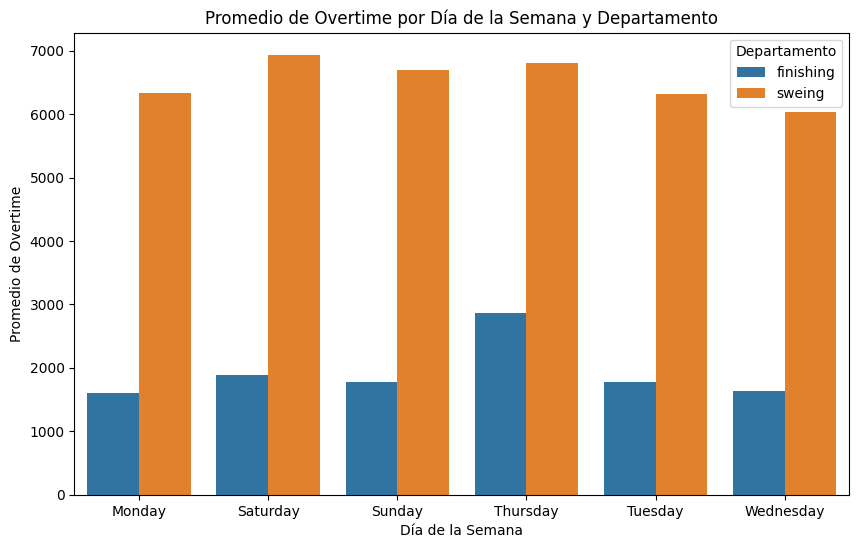

In [21]:
# Agrupar los datos por departamento y día de la semana y calcular el promedio de overtime
grouped_data = data.groupby(['department', 'day'])['over_time'].mean().reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='over_time', hue='department', data=grouped_data)
plt.title('Promedio de Overtime por Día de la Semana y Departamento')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Overtime')
plt.legend(title='Departamento')
plt.show()

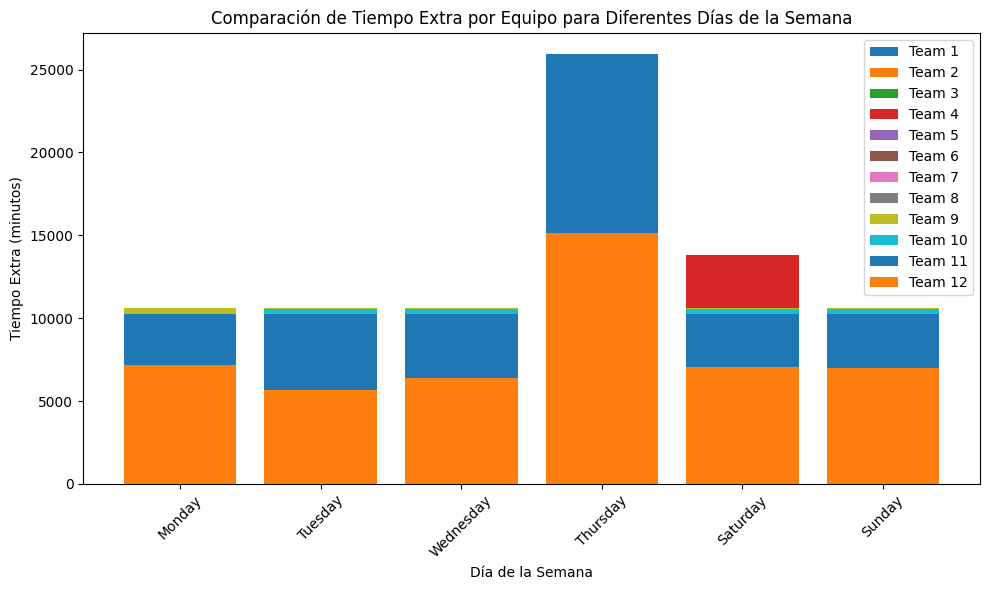

In [22]:
# Gráfico de barras para comparar el tiempo extra de cada equipo para diferentes días de la semana
plt.figure(figsize=(10, 6))
data['day'] = pd.Categorical(data['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
data = data.sort_values('day')
for team in sorted(data['team'].unique()):
    team_data = data[data['team'] == team]
    plt.bar(team_data['day'], team_data['over_time'], label=f'Team {team}')
plt.xlabel('Día de la Semana')
plt.ylabel('Tiempo Extra (minutos)')
plt.title('Comparación de Tiempo Extra por Equipo para Diferentes Días de la Semana')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


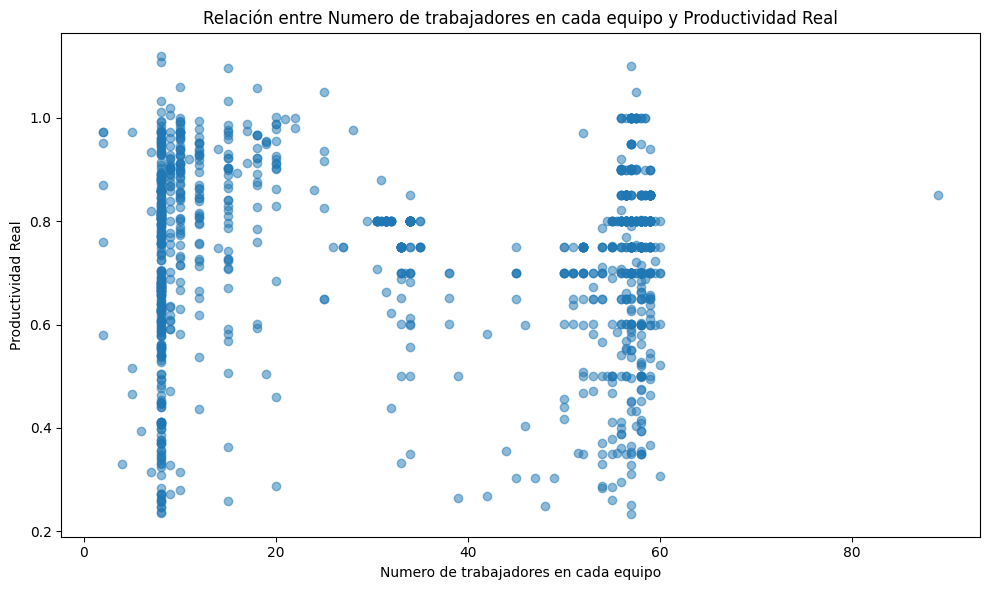

In [23]:
# Gráfico de dispersión para mostrar la relación entre el número de trabajadores por equipo y la productividad real
plt.figure(figsize=(10, 6))
plt.scatter(data['no_of_workers'], data['actual_productivity'], alpha=0.5)
plt.xlabel('Numero de trabajadores en cada equipo')
plt.ylabel('Productividad Real')
plt.title('Relación entre Numero de trabajadores en cada equipo y Productividad Real')
plt.tight_layout()
plt.show()

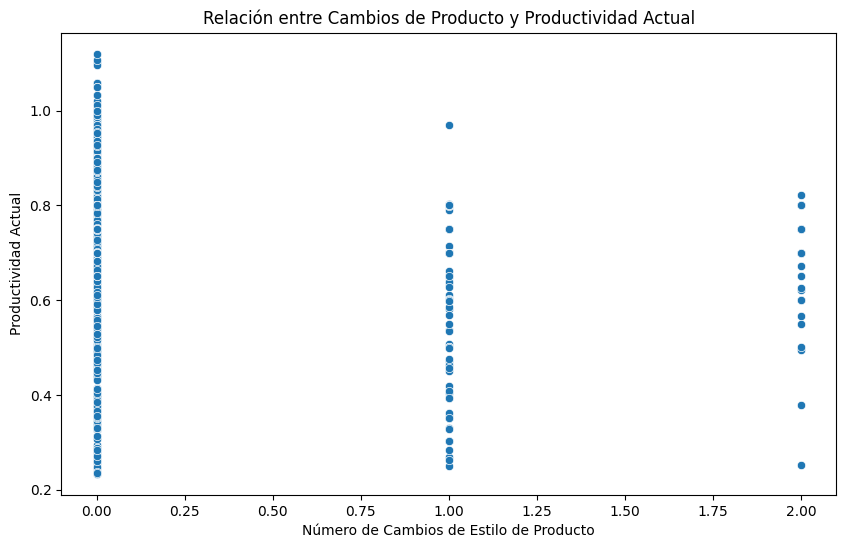

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='no_of_style_change', y='actual_productivity')
plt.title('Relación entre Cambios de Producto y Productividad Actual')
plt.xlabel('Número de Cambios de Estilo de Producto')
plt.ylabel('Productividad Actual')
plt.show()

## Division por equipos

In [25]:
uno = data[data['team'] == 1]
dos = data[data['team'] == 2]
tres = data[data['team'] == 3]
cuatro = data[data['team'] == 4]
cinco = data[data['team'] == 5]
seis = data[data['team'] == 6]
siete = data[data['team'] == 7]
ocho = data[data['team'] == 8]
nueve = data[data['team'] == 9]
diez = data[data['team'] == 10]
once = data[data['team'] == 11]
doce = data[data['team'] == 12]

## Modelos

### Modelo con todas las variables

Variables explicativas

In [26]:
features = ["day","quarter","department","team","no_of_workers","no_of_style_change","targeted_productivity","smv","wip","over_time","incentive","idle_time","idle_men"]
X = data[features]
X = pd.get_dummies(X, columns=['day', 'team', 'quarter', 'department'], dtype=int, drop_first=True)

X.head()

X.shape

(1197, 31)

Variables de respuesta

In [27]:
Y=data["actual_productivity"]

Y.head()

Y.shape

(1197,)

In [28]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)


Regresión y resultados

In [29]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.326
Model:                             OLS   Adj. R-squared:                  0.305
Method:                  Least Squares   F-statistic:                     14.96
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           1.68e-60
Time:                         23:07:29   Log-Likelihood:                 492.75
No. Observations:                  957   AIC:                            -923.5
Df Residuals:                      926   BIC:                            -772.7
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

Verificacion de multicolinialidad con estos datos

In [30]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Agrega una columna constante al DataFrame si aún no está presente
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                 Variable        VIF
1           no_of_workers  21.121234
2      no_of_style_change   1.478017
3   targeted_productivity   1.143699
4                     smv   7.055434
5                     wip   1.090576
6               over_time   2.617388
7               incentive   1.062081
8               idle_time   1.509257
9                idle_men   1.572741
10            day_Tuesday   1.742997
11          day_Wednesday   1.764653
12           day_Thursday   1.815920
13             day_Friday        NaN
14           day_Saturday   1.802762
15             day_Sunday   1.755803
16                 team_2   1.864828
17                 team_3   1.780694
18                 team_4   1.862189
19                 team_5   1.820184
20                 team_6   2.224949
21                 team_7   1.811520
22                 team_8   1.914843
23                 team_9   1.832035
24                team_10   1.808102
25                team_11   1.896129
26                team_12   2.279992
2

### Modelo con las variables significativas

Variables explicativas

In [31]:
features = ["department","team","no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = data[features]
X = pd.get_dummies(X, columns=[ 'team', 'department'], dtype=int, drop_first=True)

X.head()

X.shape

(1197, 17)

Variables de respuesta

In [32]:
Y=data["actual_productivity"]

Y.head()

Y.shape

(1197,)

In [33]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)


Regresión y resultados

In [34]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.299
Model:                             OLS   Adj. R-squared:                  0.287
Method:                  Least Squares   F-statistic:                     23.61
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           2.83e-61
Time:                         23:07:30   Log-Likelihood:                 473.89
No. Observations:                  957   AIC:                            -911.8
Df Residuals:                      939   BIC:                            -824.2
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

Verificacion de la multicolinialidad

In [35]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Agrega una columna constante al DataFrame si aún no está presente
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                 Variable        VIF
1           no_of_workers  19.124963
2   targeted_productivity   1.080692
3                     smv   6.968394
4               incentive   1.010126
5                idle_men   1.032892
6                  team_2   1.855156
7                  team_3   1.758899
8                  team_4   1.843114
9                  team_5   1.789210
10                 team_6   2.198128
11                 team_7   1.794525
12                 team_8   1.883052
13                 team_9   1.821531
14                team_10   1.801740
15                team_11   1.851296
16                team_12   2.260970
17      department_sweing  15.492787


### Modelo con variables significativas y sin el departamento

Variables explicativas

In [36]:
features = ["team","no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = data[features]
X = pd.get_dummies(X, columns=['team'], dtype=int, drop_first=True)

X.head()

X.shape

(1197, 16)

Variables de respuesta

In [37]:
Y=data["actual_productivity"]

Y.head()

Y.shape

(1197,)

In [38]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)



Regresión y resultados

In [39]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.298
Model:                             OLS   Adj. R-squared:                  0.286
Method:                  Least Squares   F-statistic:                     24.92
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           1.54e-61
Time:                         23:07:30   Log-Likelihood:                 472.82
No. Observations:                  957   AIC:                            -911.6
Df Residuals:                      940   BIC:                            -829.0
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

Verificacion de la multicolinialidad

In [40]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Agrega una columna constante al DataFrame si aún no está presente
# Esto es necesario para calcular el VIF correctamente
df_with_const = add_constant(X)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Filtra solo las filas correspondientes a las variables explicativas (no la constante)
vif_data = vif_data[vif_data["Variable"] != "const"]

# Imprime los resultados
print(vif_data)

                 Variable       VIF
1           no_of_workers  6.848168
2   targeted_productivity  1.079188
3                     smv  6.804794
4               incentive  1.010044
5                idle_men  1.032861
6                  team_2  1.855152
7                  team_3  1.756885
8                  team_4  1.833931
9                  team_5  1.788482
10                 team_6  1.769514
11                 team_7  1.793677
12                 team_8  1.882768
13                 team_9  1.819327
14                team_10  1.796080
15                team_11  1.824729
16                team_12  1.808016


### Modelos por cada equipo con las variables significatvas encontradas

#### Team 1

In [41]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = uno[features]
X.head()
X.shape

Y=uno["actual_productivity"]
Y.head()
Y.shape

(105,)

In [42]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 1

In [43]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_1 = sm.OLS(y_train, X_train).fit()

#resumen de resultados
print(model_1.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.488
Model:                             OLS   Adj. R-squared:                  0.462
Method:                  Least Squares   F-statistic:                     18.81
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           6.72e-11
Time:                         23:07:31   Log-Likelihood:                 66.339
No. Observations:                   84   AIC:                            -122.7
Df Residuals:                       79   BIC:                            -110.5
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [44]:
# Imprimir la tabla de coeficientes
coeficients_1 = model_1.params
print(coeficients_1)

const                   -0.126625
no_of_workers            0.002391
targeted_productivity    1.249041
smv                     -0.004855
incentive                0.000062
idle_men                 0.000000
dtype: float64


#### Team 2

In [45]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = dos[features]
X.head()
X.shape

Y=dos["actual_productivity"]
Y.head()
Y.shape

(109,)

In [46]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 2

In [47]:
import statsmodels.api as sm
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_2 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_2.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.571
Model:                             OLS   Adj. R-squared:                  0.545
Method:                  Least Squares   F-statistic:                     21.56
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           1.17e-13
Time:                         23:07:31   Log-Likelihood:                 59.780
No. Observations:                   87   AIC:                            -107.6
Df Residuals:                       81   BIC:                            -92.76
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [48]:
# Imprimir la tabla de coeficientes
coeficients_2 = model_2.params
print(coeficients_2)

const                   -1.631571e-01
no_of_workers            9.264694e-03
targeted_productivity    1.252058e+00
smv                     -1.974371e-02
incentive                9.434476e-07
idle_men                -5.004106e-03
dtype: float64


#### Team 3

In [49]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = tres[features]
X.head()
X.shape

Y=tres["actual_productivity"]
Y.head()
Y.shape

(95,)

In [50]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 3

In [51]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_3 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_3.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.290
Model:                             OLS   Adj. R-squared:                  0.250
Method:                  Least Squares   F-statistic:                     7.266
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           5.80e-05
Time:                         23:07:31   Log-Likelihood:                 56.424
No. Observations:                   76   AIC:                            -102.8
Df Residuals:                       71   BIC:                            -91.19
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [52]:
# Imprimir la tabla de coeficientes
coeficients_3 = model_3.params
print(coeficients_3)

const                    0.219944
no_of_workers            0.001887
targeted_productivity    0.852031
smv                     -0.006975
incentive               -0.000024
idle_men                 0.000000
dtype: float64


#### Team 4

In [53]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = cuatro[features]
X.head()
X.shape

Y=cuatro["actual_productivity"]
Y.head()
Y.shape

(105,)

In [54]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 4

In [55]:
import statsmodels.api as sm
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_4= sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_4.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.385
Model:                             OLS   Adj. R-squared:                  0.354
Method:                  Least Squares   F-statistic:                     12.36
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           7.47e-08
Time:                         23:07:31   Log-Likelihood:                 65.842
No. Observations:                   84   AIC:                            -121.7
Df Residuals:                       79   BIC:                            -109.5
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [56]:
# Imprimir la tabla de coeficientes
coeficients_4 = model_4.params
print(coeficients_4)

const                    0.325908
no_of_workers            0.004632
targeted_productivity    0.677303
smv                     -0.013046
incentive                0.000025
idle_men                 0.000000
dtype: float64


#### Team 5

In [57]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = cinco[features]
X.head()
X.shape

Y=cinco["actual_productivity"]
Y.head()
Y.shape

(93,)

In [58]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 5

In [59]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_5 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_5.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.279
Model:                             OLS   Adj. R-squared:                  0.226
Method:                  Least Squares   F-statistic:                     5.267
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           0.000380
Time:                         23:07:31   Log-Likelihood:                 36.562
No. Observations:                   74   AIC:                            -61.12
Df Residuals:                       68   BIC:                            -47.30
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [60]:
# Imprimir la tabla de coeficientes
coeficients_5 = model_5.params
print(coeficients_5)

const                    0.414571
no_of_workers            0.000621
targeted_productivity    0.588862
smv                     -0.007358
incentive                0.000048
idle_men                -0.009898
dtype: float64


#### Team 6

In [61]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = seis[features]
X.head()
X.shape

Y=seis["actual_productivity"]
Y.head()
Y.shape

(94,)

In [62]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 6

In [63]:
import statsmodels.api as sm
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_6 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_6.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.288
Model:                             OLS   Adj. R-squared:                  0.248
Method:                  Least Squares   F-statistic:                     7.085
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           7.54e-05
Time:                         23:07:31   Log-Likelihood:                 37.518
No. Observations:                   75   AIC:                            -65.04
Df Residuals:                       70   BIC:                            -53.45
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [64]:
# Imprimir la tabla de coeficientes
coeficients_6 = model_6.params
print(coeficients_6)

const                    0.226519
no_of_workers            0.000786
targeted_productivity    0.535271
smv                     -0.002221
incentive                0.002929
idle_men                 0.000000
dtype: float64


#### Team 7

In [65]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = siete[features]
X.head()
X.shape

Y=siete["actual_productivity"]
Y.head()
Y.shape

(96,)

In [66]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 7

In [67]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_7 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_7.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.373
Model:                             OLS   Adj. R-squared:                  0.328
Method:                  Least Squares   F-statistic:                     8.321
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           3.25e-06
Time:                         23:07:31   Log-Likelihood:                 39.910
No. Observations:                   76   AIC:                            -67.82
Df Residuals:                       70   BIC:                            -53.84
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [68]:
# Imprimir la tabla de coeficientes
coeficients_7 = model_7.params
print(coeficients_7)

const                    0.550709
no_of_workers           -0.002626
targeted_productivity    0.211062
smv                     -0.001915
incentive                0.005634
idle_men                -0.001678
dtype: float64


#### Team 8

In [69]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = ocho[features]
X.head()
X.shape

Y=ocho["actual_productivity"]
Y.head()
Y.shape

(109,)

In [70]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 8

In [71]:
import statsmodels.api as sm
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_8= sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_8.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.110
Model:                             OLS   Adj. R-squared:                  0.056
Method:                  Least Squares   F-statistic:                     2.011
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):             0.0857
Time:                         23:07:32   Log-Likelihood:                 33.687
No. Observations:                   87   AIC:                            -55.37
Df Residuals:                       81   BIC:                            -40.58
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [72]:
# Imprimir la tabla de coeficientes
coeficients_8 = model_8.params
print(coeficients_8)

const                    0.516069
no_of_workers            0.002652
targeted_productivity    0.246126
smv                     -0.005738
incentive               -0.000301
idle_men                -0.006728
dtype: float64


#### Team 9

In [73]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = nueve[features]
X.head()
X.shape

Y=nueve["actual_productivity"]
Y.head()
Y.shape

(104,)

In [74]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 9

In [75]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_9= sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_9.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.330
Model:                             OLS   Adj. R-squared:                  0.296
Method:                  Least Squares   F-statistic:                     9.617
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           2.25e-06
Time:                         23:07:32   Log-Likelihood:                 46.610
No. Observations:                   83   AIC:                            -83.22
Df Residuals:                       78   BIC:                            -71.13
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [76]:
# Imprimir la tabla de coeficientes
coeficients_9 = model_9.params
print(coeficients_9)

const                   -0.100674
no_of_workers            0.000193
targeted_productivity    1.063510
smv                     -0.004277
incentive                0.003135
idle_men                 0.000000
dtype: float64


#### Team 10

In [77]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = diez[features]
X.head()
X.shape

Y=diez["actual_productivity"]
Y.head()
Y.shape

(100,)

In [78]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 10

In [79]:
import statsmodels.api as sm
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_10 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_10.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.415
Model:                             OLS   Adj. R-squared:                  0.376
Method:                  Least Squares   F-statistic:                     10.50
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           1.22e-07
Time:                         23:07:32   Log-Likelihood:                 38.361
No. Observations:                   80   AIC:                            -64.72
Df Residuals:                       74   BIC:                            -50.43
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [80]:
# Imprimir la tabla de coeficientes
coeficients_10 = model_10.params
print(coeficients_10)

const                   -0.533350
no_of_workers            0.007648
targeted_productivity    1.598953
smv                     -0.012555
incentive               -0.000079
idle_men                -0.011277
dtype: float64


#### Team 11

In [81]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = once[features]
X.head()
X.shape

Y=once["actual_productivity"]
Y.head()
Y.shape

(88,)

In [82]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 11

In [83]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_11 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_11.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.471
Model:                             OLS   Adj. R-squared:                  0.429
Method:                  Least Squares   F-statistic:                     11.38
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           7.07e-08
Time:                         23:07:32   Log-Likelihood:                 49.049
No. Observations:                   70   AIC:                            -86.10
Df Residuals:                       64   BIC:                            -72.61
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [84]:
# Imprimir la tabla de coeficientes
coeficients_11 = model_11.params
print(coeficients_11)

const                    0.020498
no_of_workers            0.002115
targeted_productivity    0.868395
smv                     -0.003689
incentive                0.000257
idle_men                -0.006169
dtype: float64


#### Team 12

In [85]:
features = ["no_of_workers","targeted_productivity","smv","incentive","idle_men"]
X = doce[features]
X.head()
X.shape

Y=doce["actual_productivity"]
Y.head()
Y.shape

(99,)

In [86]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

Regresión modelo 12

In [87]:
import statsmodels.api as sm
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model_12= sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model_12.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.357
Model:                             OLS   Adj. R-squared:                  0.322
Method:                  Least Squares   F-statistic:                     10.28
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):           1.13e-06
Time:                         23:07:32   Log-Likelihood:                 64.951
No. Observations:                   79   AIC:                            -119.9
Df Residuals:                       74   BIC:                            -108.1
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

c:\Users\juanm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [88]:
# Imprimir la tabla de coeficientes
coeficients_12 = model_12.params
print(coeficients_12)

const                   -0.056293
no_of_workers           -0.001861
targeted_productivity    1.091825
smv                      0.003194
incentive                0.000079
idle_men                 0.000000
dtype: float64


## Resumen variables de interes


### Coficientes de cada modelo

In [89]:
coef_df = pd.DataFrame(index=coeficients_1.index)  # Usamos el índice de uno de los conjuntos de coeficientes

# Iterar sobre los modelos y agregar los coeficientes al DataFrame
for i in range(1, 13):  # Iterar sobre los 12 modelos
    coef_df[f'Model_{i}'] = globals()[f'coeficients_{i}'].values

# Imprimir el DataFrame con los coeficientes de todos los modelos
print(coef_df)

                        Model_1       Model_2   Model_3   Model_4   Model_5  \
const                 -0.126625 -1.631571e-01  0.219944  0.325908  0.414571   
no_of_workers          0.002391  9.264694e-03  0.001887  0.004632  0.000621   
targeted_productivity  1.249041  1.252058e+00  0.852031  0.677303  0.588862   
smv                   -0.004855 -1.974371e-02 -0.006975 -0.013046 -0.007358   
incentive              0.000062  9.434476e-07 -0.000024  0.000025  0.000048   
idle_men               0.000000 -5.004106e-03  0.000000  0.000000 -0.009898   

                        Model_6   Model_7   Model_8   Model_9  Model_10  \
const                  0.226519  0.550709  0.516069 -0.100674 -0.533350   
no_of_workers          0.000786 -0.002626  0.002652  0.000193  0.007648   
targeted_productivity  0.535271  0.211062  0.246126  1.063510  1.598953   
smv                   -0.002221 -0.001915 -0.005738 -0.004277 -0.012555   
incentive              0.002929  0.005634 -0.000301  0.003135 -0.000079

### R cuadrado de cada modelo

In [90]:
import pandas as pd

# Supongamos que ya tienes valores de R cuadrado y R cuadrado ajustado para los 12 modelos, como rsquared_1, rsquared_2, ..., rsquared_12
# y rsquared_adj_1, rsquared_adj_2, ..., rsquared_adj_12, respectivamente.

# Crear un DataFrame para almacenar los valores de R cuadrado y R cuadrado ajustado de todos los modelos
r2_df = pd.DataFrame(index=['R-squared', 'Adjusted R-squared'])

for i in range(1, 13):  # Iterar sobre los 12 modelos
    model = globals()[f'model_{i}']  # Obtener el objeto del modelo
    r2_df[f'Model_{i}'] = [model.rsquared, model.rsquared_adj]

# Imprimir el DataFrame con los valores de R cuadrado y R cuadrado ajustado de todos los modelos
print(r2_df)

                     Model_1   Model_2   Model_3   Model_4   Model_5  \
R-squared           0.487862  0.570988  0.290441  0.384876  0.279156   
Adjusted R-squared  0.461931  0.544506  0.250466  0.353731  0.226153   

                     Model_6   Model_7   Model_8   Model_9  Model_10  \
R-squared           0.288193  0.372785  0.110442  0.330290  0.415040   
Adjusted R-squared  0.247518  0.327984  0.055531  0.295946  0.375515   

                    Model_11  Model_12  
R-squared           0.470666  0.357109  
Adjusted R-squared  0.429312  0.322358  


## Creación del tablero

Librerías para el dash

In [91]:
import dash
from dash import dcc  # dash core components
from dash import html # dash html components
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

Tablero

In [92]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

app.layout = html.Div([
    html.H3("Modelo de Predicción de Productividad"),  
    html.H5("Ingrese los Parámetros"),  
    html.Div(["Ingrese el número de trabajadores del equipo (usualmente entre 5 y 70):",
              dcc.Input(id='no_of_workers', type='number', value=20)]),
    html.Br(),
    html.Div(["Ingrese la productividad objetivo del equipo (debe estar entre 0 y 1):",
              dcc.Input(id='targeted_productivity', type='number', value=0.7)]),
    html.Br(),
    html.Div(["Ingrese el tiempo asignado para la tarea en minutos estándar (usualmente entre 5 y 50):",
              dcc.Input(id='smv', type='number', value=40)]),
    html.Br(),
    html.Div(["Ingrese el incentivo financiero (usualmente menor a 100):",
              dcc.Input(id='incentive', type='number', value=70)]),
    html.Br(),
    html.Label("Use el slider para seleccionar el número de trabajadores inactivos debido a la interrupción de la productividad"),
    dcc.Slider(
        id='idle_men_slider',
        min=0,
        max=50,
        marks={str(men): str(men) for men in range(0,51)},
        step=1,
        value=5 
    ),
    html.Br(),
    html.H5("Resultados de Productividad"),
    dcc.Graph(id='graph_prod'),  # Componente de gráfica
    html.Div(id='productivity_summary')
])

@app.callback(
    [Output('graph_prod', 'figure'),
     Output('productivity_summary', 'children')],
    [Input('no_of_workers', 'value'),
     Input('targeted_productivity', 'value'),
     Input('smv', 'value'),
     Input('incentive', 'value'),
     Input('idle_men_slider', 'value')]
)
def update_figure(no_of_workers, targeted_productivity, smv, incentive, idle_men):
    # Crear DataFrame para almacenar coeficientes
    coef_df = pd.DataFrame()

    # Extraer coeficientes usando globals()
    for i in range(1, 13): 
        coef_df[f'Model_{i}'] = globals()[f'coeficients_{i}']

    # Calcular productividad
    productividades = []
    for i in range(1, 13):
        coefs = coef_df[f'Model_{i}']
        productividad = (coefs['const'] +
                         coefs['no_of_workers'] * no_of_workers +
                         coefs['targeted_productivity'] * targeted_productivity +
                         coefs['smv'] * smv +
                         coefs['incentive'] * incentive +
                         coefs['idle_men'] * idle_men)
        productividad = max(0, min(1, productividad))
        productividades.append(productividad)
    
    max_productivity_index = productividades.index(max(productividades))
    min_productivity_index = productividades.index(min(productividades))
    max_team = f'Equipo {max_productivity_index + 1}'
    min_team = f'Equipo {min_productivity_index + 1}'

    # Texto resumen
    summary_text = f"Para los parámetros dados, el equipo con mayor productividad es el {max_team} y el equipo con menor productividad es el {min_team}."

    # Crear gráfica de barras
    equipos = [f'Equipo {i}' for i in range(1, 13)]
    fig = px.bar(x=equipos, y=productividades, labels={'x': 'Equipo', 'y': 'Predicción de Productividad'},
                 title="Predicción de Productividad por Equipo")
    fig.update_layout(yaxis=dict(range=[0, 1]))
    return fig,summary_text


if __name__ == '__main__':
    app.run_server(debug=True)
